# Connect four classification

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, confusion_matrix 
from sklearn.model_selection import cross_val_score
import seaborn as sns
import pickle

In [2]:
data =  pd.read_csv('connectfour.data', sep=",")
data=data.drop('win', axis = 1)
print(data)

       b b.1 b.2 b.3 b.4 b.5 b.6 b.7 b.8 b.9  ... b.24 b.25 b.26 b.27 b.28  \
0      b   b   b   b   b   b   b   b   b   b  ...    b    b    b    b    b   
1      b   b   b   b   b   b   o   b   b   b  ...    b    b    b    b    b   
2      b   b   b   b   b   b   b   b   b   b  ...    b    b    b    b    b   
3      o   b   b   b   b   b   b   b   b   b  ...    b    b    b    b    b   
4      b   b   b   b   b   b   b   b   b   b  ...    b    b    b    b    o   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...   
67551  x   x   b   b   b   b   o   x   o   b  ...    b    b    b    b    o   
67552  x   x   b   b   b   b   o   b   b   b  ...    b    b    b    b    o   
67553  x   x   b   b   b   b   o   o   b   b  ...    b    b    b    b    o   
67554  x   o   b   b   b   b   o   b   b   b  ...    b    b    b    b    o   
67555  x   o   o   o   x   b   o   b   b   b  ...    b    b    b    b    x   

      b.29 b.30 b.31 b.32 b.33  
0        b    b    b    b    b

In [3]:
y_df = pd.read_csv('generated_data_y.csv',header=None)
y = y_df.iloc[:,1]
y

0        4.0
1        0.0
2        4.0
3        4.0
4        4.0
        ... 
67551    3.0
67552    3.0
67553    3.0
67554    3.0
67555    3.0
Name: 1, Length: 67556, dtype: float64

In [4]:
data=data.join(y)
data

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,...,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33,1
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,4.0
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,0.0
2,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,4.0
3,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,4.0
4,b,b,b,b,b,b,b,b,b,b,...,b,b,b,o,b,b,b,b,b,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67551,x,x,b,b,b,b,o,x,o,b,...,b,b,b,o,o,x,b,b,b,3.0
67552,x,x,b,b,b,b,o,b,b,b,...,b,b,b,o,x,o,o,x,b,3.0
67553,x,x,b,b,b,b,o,o,b,b,...,b,b,b,o,x,x,o,b,b,3.0
67554,x,o,b,b,b,b,o,b,b,b,...,b,b,b,o,x,o,x,x,b,3.0


In [5]:
data.iloc[0].unique()

array(['b', 'x', 'o', 4.0], dtype=object)

In [6]:
y_df.iloc[:,1].unique()

array([ 4.,  0.,  2.,  1.,  6.,  5., nan,  3.])

In [7]:
col=data.columns.tolist()
print(col)

['b', 'b.1', 'b.2', 'b.3', 'b.4', 'b.5', 'b.6', 'b.7', 'b.8', 'b.9', 'b.10', 'b.11', 'x', 'o', 'b.12', 'b.13', 'b.14', 'b.15', 'x.1', 'o.1', 'x.2', 'o.2', 'x.3', 'o.3', 'b.16', 'b.17', 'b.18', 'b.19', 'b.20', 'b.21', 'b.22', 'b.23', 'b.24', 'b.25', 'b.26', 'b.27', 'b.28', 'b.29', 'b.30', 'b.31', 'b.32', 'b.33', 1]


In [8]:
data[data.isnull().any(axis=1)]

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,...,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33,1
2564,o,b,b,b,b,b,x,x,o,b,...,b,b,b,b,b,b,b,b,b,NaN
2570,o,x,b,b,b,b,x,b,b,b,...,b,b,b,b,b,b,b,b,b,NaN
2603,b,b,b,b,b,b,o,o,b,b,...,b,b,b,x,b,b,b,b,b,NaN
2606,b,b,b,b,b,b,o,b,b,b,...,b,b,b,x,o,b,b,b,b,NaN
2646,x,o,b,b,b,b,o,b,b,b,...,b,b,b,x,b,b,b,b,b,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50677,b,b,b,b,b,b,x,o,x,b,...,b,b,b,x,b,b,b,b,b,NaN
50679,o,b,b,b,b,b,x,x,x,o,...,b,b,b,b,b,b,b,b,b,NaN
50690,b,b,b,b,b,b,x,b,b,b,...,b,b,b,x,o,b,b,b,b,NaN
50831,x,b,b,b,b,b,x,o,o,b,...,b,b,b,o,x,b,b,b,b,NaN


In [9]:
data=data.dropna()

In [10]:
#X and Y
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [11]:
X

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,...,b.24,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,b
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,b
2,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,b
3,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,b
4,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,o,b,b,b,b,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67551,x,x,b,b,b,b,o,x,o,b,...,b,b,b,b,o,o,x,b,b,b
67552,x,x,b,b,b,b,o,b,b,b,...,b,b,b,b,o,x,o,o,x,b
67553,x,x,b,b,b,b,o,o,b,b,...,b,b,b,b,o,x,x,o,b,b
67554,x,o,b,b,b,b,o,b,b,b,...,b,b,b,b,o,x,o,x,x,b


In [12]:
y.unique()

array([4., 0., 2., 1., 6., 5., 3.])

In [13]:
#Label encoding
le = preprocessing.LabelEncoder()

In [14]:
#Transforming X
for i in range(len(col)-1):
    X[col[i]]=le.fit_transform(X[col[i]])

In [15]:
X.shape

(67336, 42)

In [16]:
y.shape

(67336,)

In [17]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [18]:
X_train.shape

(53868, 42)

In [19]:
X_test.shape

(13468, 42)

In [20]:
mlp = make_pipeline(MLPClassifier(hidden_layer_sizes=(200,150,100,100,50), 
                                  activation='relu', max_iter=200, tol=0.5))
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)
y_pred_mlp

array([4., 4., 3., ..., 2., 3., 2.])

In [21]:
accuracy_score(y_test,y_pred_mlp)

0.6430798930798931

In [22]:
recall_score(y_test,y_pred_mlp,average='macro')

0.4273148481270604

In [23]:
precision_score(y_test,y_pred_mlp,average='macro')

0.4891883451544921

In [24]:
f1_score(y_test,y_pred_mlp,average='macro')

0.42917346459842853

<AxesSubplot:>

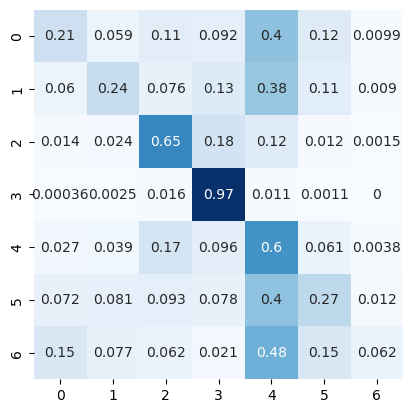

In [25]:
conf_mat = confusion_matrix(y_test, y_pred_mlp, normalize='true')
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', cbar=False)

In [28]:
# save the model to disk
filename = 'final_mlp_model.pkl'
pickle.dump(mlp, open(filename, 'wb'))